# DA5401 A7: Multi-Class Model Selection using ROC and Precision-Recall Curves

### Name: Kaki Hephzi Sunanda
### Roll Number: DA25M015

**Given Objective**:

This assignment challenges you to apply and interpret **Receiver Operating Characteristic (ROC)** curves and **Precision-Recall Curves (PRC)** for model selection in a multi-class, complex classification environment. You will compare a diverse set of classifiers, including those known to perform poorly, requiring careful analysis of the curves rather than relying solely on simple accuracy.

# Problem Statement

You are a machine learning scientist tasked with classifying land cover types using satellite image data. You have the **UCI Landsat Satellite dataset**, a multi-class problem (6 classes) known to be non-trivial due to high feature dimensionality and potential class overlap.

Your primary goal is to perform model selection by comparing various classifier types. You must use **ROC** and **PRC** analysis, adapted for the multi-class setting (e.g., using one-vs-rest averaging), to determine the best-performing and worst-performing models, paying special attention to the performance across different decision thresholds.

You will submit a Jupyter Notebook with your complete code, visualizations, and a plausible story that explains your findings. The notebook should be well-commented, reproducible, and easy to follow.

**Dataset:**

- **Landsat Satellite Dataset**: A classic multi-class problem with six primary classes. Ignore the class label that says "all types present".
	- **Citation**: Blake, C. and Merz, C.J. (1998). UCI Repository of machine learning databases. Irvine, CA: University of California, Department of Information and Computer Science.
	- **Download Link (UCI ML Repository)**: [UCI Machine Learning Repository - Satimage](https://archive.ics.uci.edu/dataset/146/statlog+landsat+satellite)


**Model Classes for Comparison (Minimum Five):**

| S.No | Model Class | Python Library/Reference | Performance Expectation |
|----|-----------|------------------------|-----------------------|
| 1. | K-Nearest Neighbors (KNN) | sklearn.neighbors.KNeighborsClassifier | Moderate/Good |
| 2. | Decision Tree Classifier | sklearn.tree.DecisionTreeClassifier | Moderate |
| 3. | Dummy Classifier (Prior) | sklearn.dummy.DummyClassifier | Baseline (Likely AUC < 0.5 for minority classes) |
| 4. | Logistic Regression | sklearn.linear_model.LogisticRegression | Good/Baseline (Linear model benchmark) |
| 5. | Naive Bayes (Gaussian) | sklearn.naive_bayes.GaussianNB | Poor/Varies (Simple assumptions fail in complex data) |
| 6. | Support Vector Machine (SVC) | sklearn.svm.SVC | Good (Requires probability=True for ROC/PRC) |

---

 ##  <span style="color:Orange"> **About the Dataset** </span>

- The **Statlog (Landsat Satellite)** dataset contains multi-spectral measurements of **3×3 pixel neighborhoods** from Landsat MSS (Multi-Spectral Scanner) satellite imagery.
- The objective is to classify the **central pixel** into one of **7 land-cover classes** based on spectral band values.
- It includes **6435 instances** and **36 numerical features** (pixel values from 4 spectral bands for each of the 9 pixels in the neighborhood).
- Dataset Details:
  - **Total samples:** 6435
  - **Number of attributes:** 36 input features (all integer values from 0–255)
  - **Target variable:** `class` (7 categories)
  - **Source:** Landsat MSS satellite (visible + near-infrared spectral bands)


**Class Labels:**

| Label | Land Cover Type                  |
|-------|----------------------------------|
| 1     | Red soil                         |
| 2     | Cotton crop                      |
| 3     | Grey soil                        |
| 4     | Damp grey soil                   |
| 5     | Soil with vegetation stubble     |
| 6     | Mixture class (all types present) *(not present in this dataset)* |
| 7     | Very damp grey soil              |


**Feature Details**

- The 36 features correspond to spectral values from **4 bands × 9 pixels** in a **3×3** neighborhood.
- Pixel order follows a **top-left → top-right → bottom-left → bottom-right** scan.
- **Central pixel spectral values** appear in:
  - **Attributes 17, 18, 19, 20**
  - Some studies use only these four features to avoid boundary overlap issues.



**Additional Notes**

- No missing values are present in the dataset.
- Pixel resolution: **80m × 80m**
- Each pixel is an **8-bit** value (range 0–255).
- Data is randomly ordered — original spatial structure cannot be reconstructed.


This dataset is commonly used for benchmarking classification methods in **remote sensing** and **Earth observation**.


Some Images from the Landasat:

<img src="https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/styles/side_image/public/thumbnails/image/dmidmss_thumb.jpg?itok=clp26X_-" alt="Landsat 2 MSS acquired June 8, 1979(Path 44, Row 36)(Public domain)" width="500"/>

<img src="https://d9-wret.s3.us-west-2.amazonaws.com/assets/palladium/production/s3fs-public/styles/full_width/public/media/images/L1_028037_19720725_B654_firstlight.jpg?itok=4Co5IoUk" alt="Landsat 1 First Light Image of Texas" width="500"/>

# Part A: Data Preparation and Baseline

## Question 1 : Load and Prepare Data

Load the Landsat dataset. **Standardize** the features (X)

In [86]:
%reset -f

In [87]:
# Import necessary libraries.

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [88]:
# Install ucimlrepo to fetch the dataset.

!pip install ucimlrepo -q


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
# Import the dataset using the ucimlrepo library.

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_landsat_satellite = fetch_ucirepo(id=146) 
  
# data (as pandas dataframes) 

X = statlog_landsat_satellite.data.features 
y = statlog_landsat_satellite.data.targets 


In [90]:
# Preview of the data.

X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34,Attribute35,Attribute36
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87


In [91]:
# Labels.

y.head()

,class
0,3
1,3
2,3
3,3
4,3


In [92]:
# Dimensions of the dataset.

X = X.to_numpy()
y = y.to_numpy()

print(f"Data (X) shape : {X.shape}")
print(f"labels (y) shape : {y.shape}")

Data (X) shape : (6435, 36)
labels (y) shape : (6435, 1)


- **<u>Note</u>**:  In the assignment, Scaling is done after splitting into train and test sets to avoid data leakage.

## Question 2 : Train/Test Split

Split the data into training and testing sets.

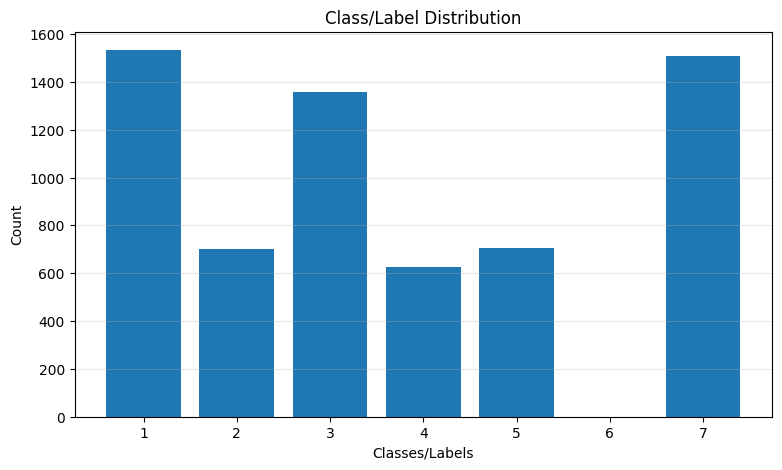

In [93]:
# Plot the label count to display class distribution in the dataset.

unique_labels, class_count = np.unique(y, return_counts=True) # Calculate the frequency of each unique class.

plt.figure(figsize=(9,5))
plt.bar(unique_labels, class_count) # Create a bar chart using the class labels and their counts.
plt.title("Class/Label Distribution")
plt.xlabel("Classes/Labels")
plt.ylabel("Count")
plt.grid(alpha=0.3, axis='y')
plt.show()

- The dataset has **`6 classes`** present (Class 6 is missing, which matches the data description).
- The class counts are **not equal**.
- Classes **1, 3, and 7** have a large number of samples.
- Classes **2, 4, and 5** have smaller counts.
- The dataset has **slight class imbalance**.
- To maintain the same class balance in both training and testing, **stratified** splitting should be applied.

In [94]:
# Import train_test_split from sklearn.modelselection.
from sklearn.model_selection import train_test_split

# Split data into train and test sets with stratification.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [95]:
# Dimensions of the dataset after splitting.

print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of y_train : {y_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_test : {y_test.shape}")

Shape of X_train : (5148, 36)
Shape of y_train : (5148, 1)
Shape of X_test : (1287, 36)
Shape of y_test : (1287, 1)


In [96]:
# Import the standard scaler tool from scikit-learn.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Initialize the scaler object.
X_train_scaled = scaler.fit_transform(X_train) # Fit the scaler and transform X_train.
X_test_scaled = scaler.transform(X_test) # Use the scaler fitted on X_train to transform X_test.

## Question 3 : Train All Models

Train one instance of each of the six specified model classes on the training data. Note: For the **Dummy** Classifier, use the 'prior' strategy. For **SVC**, ensure you set the parameter `probability=True` to enable probability predictions for ROC/PRC analysis.

In [97]:
# Import Necessary Libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


# Function to train a model and generate predictions.
def train_model(m, trainx , trainy, testx):
    m.fit(trainx, trainy.squeeze())
    yp = m.predict(testx)
    return m, yp

# List of descriptive names.
model_names = ["K-Nearest Neighbors (KNN)", 
               "Decision Tree Classifier",
               "Dummy Classifier (Prior)",
               "Logistic Regression",
               "Naive Bayes (Gaussian)",
               "Support Vector Machine (SVC)"]

RANDOM_STATE = 42 # seed.

# Dictionary mapping model keys to initialized model objects
models = {
    'knn': KNeighborsClassifier(),
    'dt': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'dummy_clf': DummyClassifier(strategy='prior', random_state=RANDOM_STATE),
    'lr': LogisticRegression(max_iter=5000, random_state=RANDOM_STATE),
    'nb': GaussianNB(),
    'svc': SVC(probability=True, random_state=RANDOM_STATE)
}

# Store model details.
trained_models = {}
y_pred_models = {}
acc_models = {}
weighted_f1_models = {}

# Loop through each model to train and evaluate/
for model in models.keys():
    trained_mdl, y_pred = train_model(models[model], X_train_scaled, y_train, X_test_scaled) # Train and predict using the helper function.
    trained_models[model] = trained_mdl # Store the trained model object
    y_pred_models[model] = y_pred # Store the predictions
    acc_models[model] = accuracy_score(y_test, y_pred) # Calculate and store the accuracy score
    weighted_f1_models[model] = f1_score(y_test, y_pred, average='weighted') # Calculate and store the weighted F1 score


## Question 4 : Baseline Evaluation

Calculate the simple **Overall Accuracy** and **Weighted F1-Score** for all six models on the test set. Observe which models perform poorly.

In [ ]:
# Create a DataFrame to summarize the model results.

model_acc_f1 = pd.DataFrame({
    'Model Name': model_names,
    'Accuracy': list(acc_models.values()),
    'Weighted F1-Score': list(weighted_f1_models.values())
})

model_acc_f1

,Model Name,Accuracy,Weighted F1-Score
0,K-Nearest Neighbors (KNN),0.912199,0.910291
1,Decision Tree Classifier,0.845377,0.846663
2,Dummy Classifier (Prior),0.238539,0.091884
3,Logistic Regression,0.850039,0.842918
4,Naive Bayes (Gaussian),0.783217,0.790059
5,Support Vector Machine (SVC),0.892774,0.891269


- KNN shows the best performance with the highest accuracy and weighted F1-score.
- SVC also performs strongly, indicating reliable generalization.
- Logistic Regression and Decision Tree models give moderate results.
- Gaussian Naive Bayes performs weaker compared to others due to mismatched feature assumptions.
- The Dummy Classifier performs very poorly, as it only predicts the majority class and does not learn from data.

# Part B: ROC Analysis for Model Selection

## Question 1 : Multi-Class ROC Calculation

Explain how the **One-vs-Rest (OvR)** approach is used to generate ROC curves and calculate the Area Under the Curve (AUC) in a multi-class setting.

- ROC-AUC is originally defined for binary classification.
- In multi-class settings, One-vs-Rest (OvR) converts the problem into multiple binary classification tasks.
- For each class $k$, we treat it as the positive class and all other classes as negative.
- A binary label is created for each class:
  $y_k(i)$ = 1 if sample i belongs to class $k$, else 0
- The model gives a probability score for each class:
  $s_k(i)$ = predicted probability that sample $i$ is class $k$
- We compute FPR and TPR for each class $k$ at different thresholds:
   $$
    \text{TPR}_k(\tau) = \frac{\text{TP}_k(\tau)}{\text{TP}_k(\tau) + \text{FN}_k(\tau)}
    $$
    $$
    \text{FPR}_k(\tau) = \frac{\text{FP}_k(\tau)}{\text{FP}_k(\tau) + \text{TN}_k(\tau)}
    $$
- This gives one ROC curve per class: $\text{ROC}_k(FPR_k, TPR_k)$
- The AUC for each class represents how well that class is separated from the rest.
- To summarize overall performance, macro-AUC is computed:
  $$ \text{Macro-AUC} = \frac{1}{K} \sum_{k=1}^{K} \text{AUC}_k $$
- Macro-AUC treats every class equally and is suitable when classes are imbalanced.
- The final macro-averaged ROC curve is formed by aligning FPR values and averaging TPR across all classes.


## Question 2 : Plotting ROC

Generate a single plot displaying the OvR ROC curves for all six models, averaging the False Positive Rate (FPR) and True Positive Rate (TPR) across
all six classes (Macro-average or Weighted-average ROC).

In [98]:
# Import functions for ROC curve points and AUC calculation
from sklearn.metrics import roc_curve, roc_auc_score

# Function to calculate the macro-averaged ROC curve points and AUC
def macro_roc_curve(model, data_x, y_labels, labels):
    y_score = model.predict_proba(data_x)  # Get probability scores for each class

    fpr_vals = np.linspace(0, 1, 100) # Define 100 common False Positive Rate points for interpolation
    tpr_avg = np.zeros_like(fpr_vals) # Initialize an array to accumulate True Positive Rates

	# Loop through each unique class to calculate its individual ROC curve
    for i, cls in enumerate(labels):
        y_1 = (y_labels == cls).astype(int) # Convert true labels into a binary array
        fpr_i, tpr_i, _ = roc_curve(y_1, y_score[:, i]) # Calculate FPR and TPR for the current class
        tpr_avg += np.interp(fpr_vals, fpr_i, tpr_i) # Interpolate TPR values to the common FPR points and accumulate

    tpr_avg /= len(labels) # Calculate the average True Positive Rate across all classes
    auc_macro = roc_auc_score(y_labels, y_score, multi_class="ovr", average="macro") # Calculate the average True Positive Rate across all classes
    
    return fpr_vals, tpr_avg, auc_macro

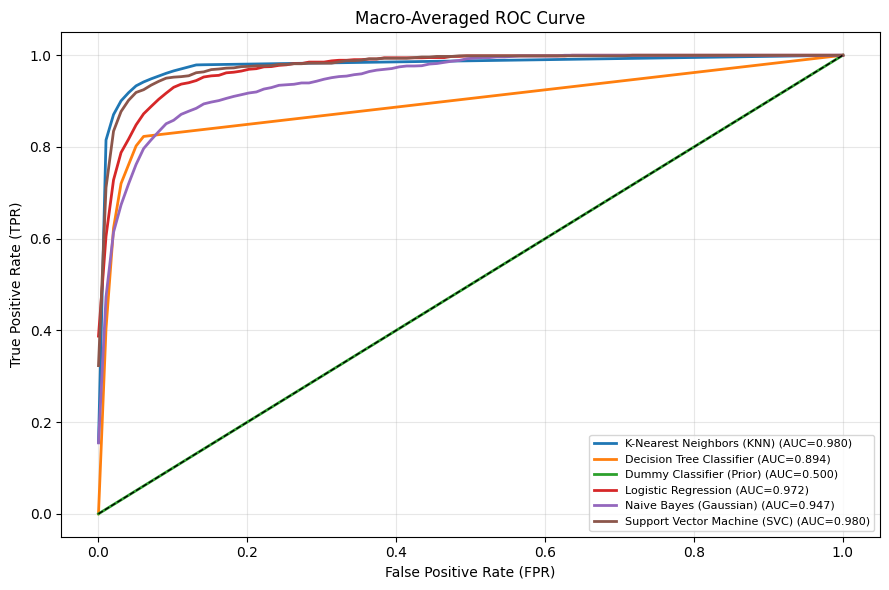

In [100]:
# Plot the  ROC Curve.

plt.figure(figsize=(9, 6))

auc_all = {} # Initialize a dictionary to store the calculated AUC scores

# Iterate through each model to calculate and plot its ROC curve.
for name, model in zip(model_names, trained_models.values()):
    fpr_m, tpr_m, auc_m = macro_roc_curve(model, X_test_scaled, y_test.squeeze(), unique_labels) # Calculate macro-averaged FPR, TPR, and AUC
    auc_all[name] = auc_m # Store the calculated macro AUC score
    plt.plot(fpr_m, tpr_m, lw=2, label=f"{name} (AUC={auc_m:.3f})") # Plot the ROC curve for the current model

plt.plot([0,1],[0,1],'k--', linewidth=1)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Macro-Averaged ROC Curve")
plt.legend(loc="lower right", fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Question 3 : ROC Interpretation

### Question 3.1 : 

*Identify the model with the highest **Macro-averaged AUC**.*

- The model with the highest macro-averaged AUC is K-Nearest Neighbors (KNN), closely matched by Support Vector Machine (SVC).
- These models achieve high true positive rates even when the false positive rates increase slightly, which means they are good at separating the different land cover classes.

### Question 3.2 : 

*Identify the model with AUC < 0.5. Explain what AUC < 0.5 implies conceptually and why a model might exhibit this performance.*

- The model with AUC 0.5 is the Dummy Classifier using the prior strategy.
- AUC of 0.5 indicates random guessing performance with no ability to distinguish between classes.
- This happens because the Dummy Classifier only predicts based on overall class frequencies and does not use any feature information.
- Poor models may exhibit AUC close to 0.5 when the decision scores overlap significantly across classes, meaning the model cannot separate correct and incorrect predictions better than chance.
- In multi-class problems, weak features or imbalance can further push the ROC curve toward the diagonal line, showing poor discriminative power.

# Part C: Precision-Recall Curve (PRC) Analysis

## Question 1 : PRC Calculation

Explain why the **Precision-Recall Curve (PRC)** is a more suitable metric than ROC when dealing with highly imbalanced classes (addressing the conceptual importance even if the imbalance in this dataset is moderate).

- ROC uses True Positive Rate (TPR) and False Positive Rate (FPR):  
  $ \text{TPR} = \frac{TP}{TP + FN} $  
  $ \text{FPR} = \frac{FP}{FP + TN} $

- In imbalanced datasets, TN is very large, so even many false positives still result in a small FPR.

- This makes ROC curves look better than the model actually is when minority classes matter.

- PRC focuses on Precision and Recall instead:  
  $ \text{Precision} = \frac{TP}{TP + FP} $  
  $ \text{Recall} = \frac{TP}{TP + FN} $

- Precision punishes false positives directly, which is crucial when minority class detection is the main goal.

- PRC highlights how well the model identifies the minority class without being affected by the large number of TNs.

- Even with moderate imbalance, PRC gives a more realistic view of classifier performance for important classes.

## Quesiton 2 : Plotting PRC

Generate a single plot displaying the OvR PRC curves for all six models, averaging the Precision and Recall across all six classes (Macro-average or
Weighted-average PRC).

In [101]:
# Import functions for PRC points and Average Precision (AP) calculation
from sklearn.metrics import precision_recall_curve, average_precision_score

# Function to calculate macro-averaged Precision-Recall curve points and AP
def macro_prc_curve(model, data_x, y_labels, labels):
    y_score = model.predict_proba(data_x) # Get probability scores for each class
    recall_vals = np.linspace(0, 1, 100) # Define 100 common Recall points for interpolation
    prec_avg = np.zeros_like(recall_vals) # Initialize an array to accumulate Precision values

	# Loop through each unique class for the One-vs-Rest calculation
    for i, cls in enumerate(labels):
        y_1 = (y_labels == cls).astype(int) # Convert true labels into a binary array
        precision_i, recall_i, _ = precision_recall_curve(y_1, y_score[:, i]) # Calculate Precision and Recall for the current class
        prec_avg += np.interp(recall_vals, recall_i[::-1], precision_i[::-1]) # Interpolate Precision values to common Recall points and accumulate

    prec_avg /= len(labels) # Calculate the average Precision across all classes
    ap_score = average_precision_score(y_labels, y_score, average="macro") # Calculate the macro-averaged Average Precision (AP) score
    return recall_vals, prec_avg, ap_score

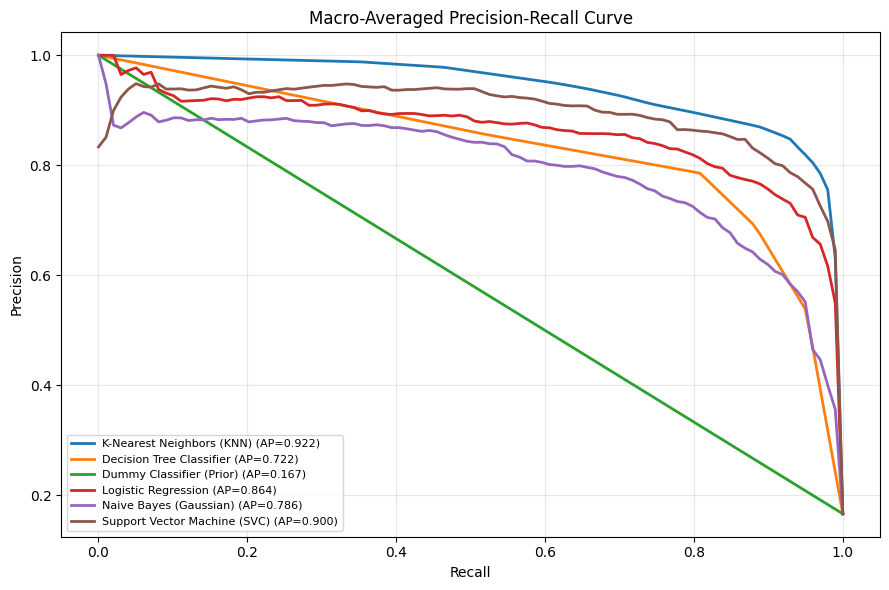

In [102]:
plt.figure(figsize=(9, 6))

ap_all = {} # Initialize a dictionary to store the calculated Average Precision (AP) scores

# Iterate through each model to calculate and plot its PRC
for name, model in zip(model_names, trained_models.values()):
    recall_m, prec_m, ap_m = macro_prc_curve(model, X_test_scaled, y_test.squeeze(), unique_labels) # Calculate macro-averaged Recall, Precision, and AP
    ap_all[name] = ap_m # Store the calculated macro AP score
    plt.plot(recall_m, prec_m, lw=2, label=f"{name} (AP={ap_m:.3f})") # Plot the Precision-Recall curve for the current model

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Macro-Averaged Precision-Recall Curve")
plt.legend(loc="lower left", fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

## Quesiton 3 : PRC Interpretation

### Question 3.1 : 

*Identify the model with the highest **Average Precision (AP)** across the classes.*

- The model with the highest Average Precision (AP) is the K-Nearest Neighbors (KNN) classifier.
- KNN maintains high precision even when recall increases, meaning it consistently predicts the correct class with fewer false positives.

### Question 3.2 : 

*Analyze the behavior of the worst-performing model's PRC. Why does the curve drop sharply as Recall increases for poor models?*

- The worst-performing model is the Dummy Classifier using prior strategy because it does not learn from features and only predicts based on class frequency.
- The PRC curve of the dummy classifier drops sharply as recall increases because it starts labeling almost everything as positive to increase recall, which brings in many false positives and drastically reduces precision.
- Poor models cannot strongly separate classes, so improving recall quickly introduces false positives, which causes precision to fall steeply.
- This behavior reflects weak discriminative power, especially when multiple classes share similar feature values.
- Good models keep precision high over a wide recall range, while poor models lose precision almost immediately as they try to find more positives.

# Part D: Final Recommendation

## Question 1 : Synthesis

Compare the model rankings derived from the initial F1-Score, the ROC-AUC, and the PRC-AP. Do the rankings align? If not, explain the specific trade-offs
(e.g., how a model with a high ROC-AUC might still have a poor PRC-AP).

| Rank | Based on Weighted F1-Score | Based on ROC-AUC | Based on PRC-AP |
|------|---------------------------|-----------------|----------------|
| 1    | K-Nearest Neighbors (0.910) | K-Nearest Neighbors (0.980) | K-Nearest Neighbors (0.922) |
| 2    | Support Vector Machine (0.891) | Support Vector Machine (0.980) | Support Vector Machine (0.900) |
| 3    | Decision Tree Classifier (0.847) | Logistic Regression (0.972) | Logistic Regression (0.864) |
| 4    | Logistic Regression (0.843) | Naive Bayes (0.947) | Naive Bayes (0.786) |
| 5    | Naive Bayes (0.790) | Decision Tree Classifier (0.894) | Decision Tree Classifier (0.722) |
| 6    | Dummy Classifier (0.092) | Dummy Classifier (0.500) | Dummy Classifier (0.167) |

- The rankings do not fully align across the three metrics.
- K-Nearest Neighbors (KNN) is consistently the best in all three metrics.
- Support Vector Machine (SVC) is also consistently the second-best across metrics.
- Decision Tree performs well in F1-Score but falls behind in ROC-AUC and PRC-AP.
- Logistic Regression has a high ROC-AUC and PRC-AP but a slightly lower F1-Score compared to Decision Tree.
- Naive Bayes performs moderately on all metrics but never ranks in the top three.
- Dummy Classifier is the worst in all rankings, as expected.

- ROC-AUC can stay high even if the model makes many false positives, because TN (true negatives) dominate in multi-class settings.
- PRC-AP is more sensitive to errors in minority classes → precision drops when false positives increase.
- A model might achieve a high ROC-AUC but low PRC-AP if it separates classes globally but struggles to correctly classify the important minority class.
- F1-Score balances precision and recall only at a single threshold, unlike ROC/PRC which consider all thresholds.

## Question 2 : Recommendation

Based on the comprehensive analysis of all curves, recommend the best model for this classification task, justifying your choice based on performance
across different thresholds and the desired balance between precision and recall.

- The best model for this task is **K-Nearest Neighbors (KNN)**.
- It has the **highest scores in all evaluation metrics** (F1-Score, ROC-AUC, PRC-AP).
- KNN maintains a **good balance between precision and recall**.
- Its ROC and PRC curves show **strong class separability**.
- Other models (SVM, Logistic Regression, Decision Tree, Naive Bayes) perform well but **not as consistently** across all metrics.
- Dummy Classifier is the **weakest** baseline model.
- Therefore, **KNN is recommended** as the final model for this classification task.

# Brownie Points Task

# Question 1

*Additionally, experiment with RandomForest and XGBoost classifiers.*

In [51]:
!pip install xgboost -q


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# List of descriptive names for the new models
model_names_add = ["Random Forest", 
               "XGBoost"]

# Dictionary mapping model keys to initialized model objects
models_add = {
    'rf': RandomForestClassifier(random_state=42),
    'xgb': xgb.XGBClassifier(objective="multi:softprob", num_class=len(unique_labels))
}

# Dictionares to store model information.
trained_models_add = {}
y_pred_models_add = {}
acc_models_add = {}
weighted_f1_models_add = {}

In [115]:
# Random Forest Model (Note: unscaled features are used for both Random Forest and XGBoost, as it does not affect tree structure.)

rf = models_add["rf"].fit(X_train, y_train.squeeze()) # Train the Random Forest model
yp_rf = rf.predict(X_test) # Generate predictions
trained_models_add["rf"] = rf # Store the trained Random Forest model object
y_pred_models_add["rf"] = yp_rf # Store the predictions	
acc_models_add["rf"] = accuracy_score(y_test, yp_rf) # Calculate and store the accuracy score
weighted_f1_models_add["rf"] = f1_score(y_test, yp_rf, average="weighted") # Calculate and store the weighted F1 score

In [116]:
# XGBoost Model

le = LabelEncoder().fit(y_train.squeeze()) # Initialize and fit the LabelEncoder on the training target variable
y_train_enc = le.transform(y_train.squeeze()) # Transform the training target variable into encoded integers
y_test_enc  = le.transform(y_test.squeeze()) # Transform the test target variable

xgb_clf = models_add["xgb"].fit(X_train, y_train_enc) # Train XGBoost
yp_xgb_enc = xgb_clf.predict(X_test) # Generate encoded predictions
yp_xgb = le.inverse_transform(yp_xgb_enc) # Inverse-transform the encoded predictions back to the original class labels

trained_models_add["xgb"] = xgb_clf # Store the trained XGBoost model object
y_pred_models_add["xgb"] = yp_xgb # Store the final, decoded predictions
acc_models_add["xgb"] = accuracy_score(y_test, yp_xgb) # Calculate and store the accuracy score using original labels
weighted_f1_models_add["xgb"] = f1_score(y_test, yp_xgb, average="weighted") # Calculate and store the weighted F1 score

In [117]:
model_acc_f1_add = pd.DataFrame({
    "Model Name": model_names_add,
    "Accuracy": [acc_models_add["rf"], acc_models_add["xgb"]],
    "Weighted F1-Score": [weighted_f1_models_add["rf"], weighted_f1_models_add["xgb"]],
})
model_acc_f1_add

,Model Name,Accuracy,Weighted F1-Score
0,Random Forest,0.91,0.90
1,XGBoost,0.91,0.91


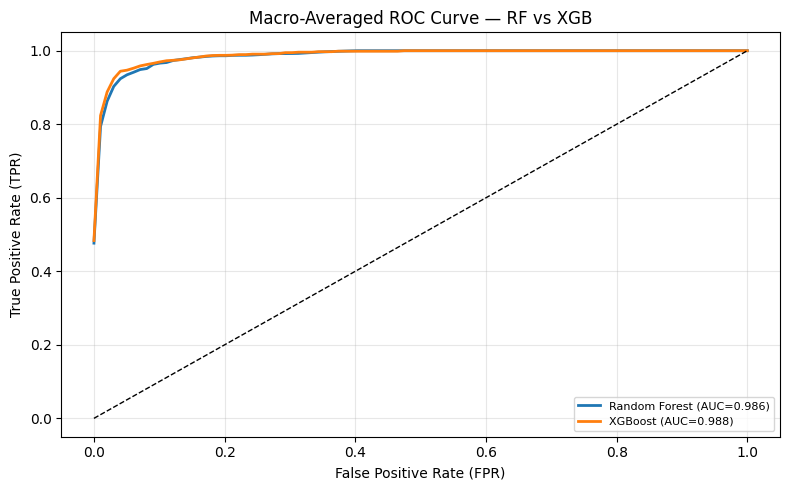

In [119]:
# Plot ROC curve for additional models.

plt.figure(figsize=(8, 5))
auc_all_add = {} # Initialize a dictionary to store the new models' AUC scores

# Calculate macro-averaged FPR, TPR, and AUC using the unscaled test features
fpr_m_rf, tpr_m_rf, auc_m_rf = macro_roc_curve(trained_models_add["rf"], X_test, y_test.squeeze(), unique_labels)
auc_all_add["Random Forest"] = auc_m_rf
plt.plot(fpr_m_rf, tpr_m_rf, lw=2, label=f"Random Forest (AUC={auc_m_rf:.3f})")


fpr_m_xgb, tpr_m_xgb, auc_m_xgb = macro_roc_curve(trained_models_add["xgb"], X_test, y_test_enc, np.arange(len(unique_labels)))
auc_all_add["XGBoost"] = auc_m_xgb
plt.plot(fpr_m_xgb, tpr_m_xgb, lw=2, label=f"XGBoost (AUC={auc_m_xgb:.3f})")

plt.plot([0,1],[0,1],'k--', linewidth=1)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Macro-Averaged ROC Curve — RF vs XGB")
plt.legend(loc="lower right", fontsize=8)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

- Both Random Forest and XGBoost show excellent performance with ROC-AUC values around 0.986 to 0.988.
- Their ROC curves overlap closely and stay near the top-left corner, meaning both models achieve high True Positive Rate at very low False Positive Rate.
- XGBoost performs slightly better than Random Forest, but the improvement is very small in ROC-AUC.
- The model performance is noticeably better than the earlier baseline models.
- The near-perfect curves suggest strong class separability in the dataset and that both ensemble methods successfully learn complex feature interactions.

# Question 2

*Identify and experiment with another model class of your choice whose AUC < 0.5*

In [125]:
# Import the Bernoulli Naive Bayes classifier
from sklearn.naive_bayes import BernoulliNB

# Train Bernoulli NB
bnb = BernoulliNB() # Initialize the Bernoulli Naive Bayes model
bnb.fit(X_train, y_train.squeeze()) # Train the model using the training features and target

# Get the probability scores for each class on the test set
scores = bnb.predict_proba(X_test)

fpr_vals = np.linspace(0, 1, 100) # Define 100 common False Positive Rate points for interpolation
tpr_sum = np.zeros_like(fpr_vals) # Initialize array to accumulate True Positive Rates
valid_classes = 0

# Loop through each class index
for i in range(scores.shape[1]):
    y_bin = (y_test.squeeze() == i).astype(int) # Create a binary target array for the current class
    if len(np.unique(y_bin)) < 2: # Check if the class is present in the test set
        continue
    fpr, tpr, _ = roc_curve(y_bin, scores[:, i]) # Calculate FPR and TPR for the current class
    tpr_sum += np.interp(fpr_vals, fpr, tpr) # Interpolate TPR values to common FPR points and accumulate
    valid_classes += 1

tpr_macro = tpr_sum / valid_classes # Calculate the average True Positive Rate (macro-average)
auc_macro = np.trapz(tpr_macro, fpr_vals) # Calculate the Macro-Averaged AUC using the trapezoidal rule


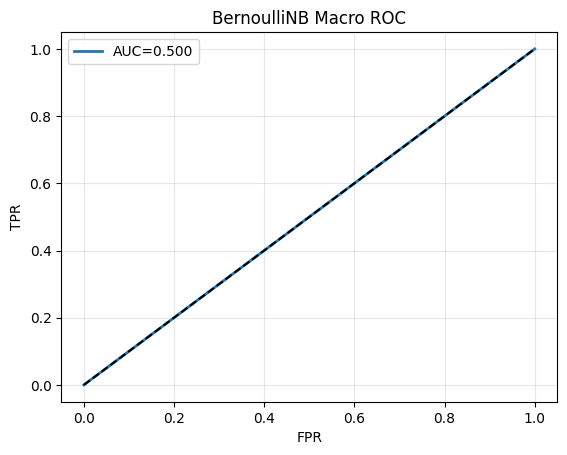

In [126]:
# Plot ROC
plt.plot(fpr_vals, tpr_macro, lw=2, label=f"AUC={auc_macro:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("BernoulliNB Macro ROC")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

- BernoulliNB shows **poor performance** on this dataset.
- The Macro-Averaged ROC curve gives **AUC ≈ 0.50**, equal to random guessing.
- This indicates that the model **fails to separate classes** effectively.
- It assumes features are **binary**, which does not align well with the dataset representation.
- BernoulliNB is **not suitable** for this classification task.